# Relative Cost of Matrix Factorizations

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [2]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import numpy.linalg as npla
import scipy.linalg as spla

import matplotlib.pyplot as pt

from time import process_time

In [3]:
n_values = (10**np.linspace(1, 3.25, 15)).astype(np.int32)
n_values

array([  10,   14,   20,   30,   43,   63,   92,  133,  193,  279,  404,
        585,  848, 1228, 1778], dtype=int32)

-----> lu
10
14
20
30
43
63
92
133
193
279
404
585
848
1228
1778
-----> qr
10
14
20
30
43
63
92
133
193
279
404
585
848
1228
1778
-----> svd
10
14
20
30
43
63
92
133
193
279
404
585
848
1228
1778


Text(0, 0.5, 'Wall time [s]')

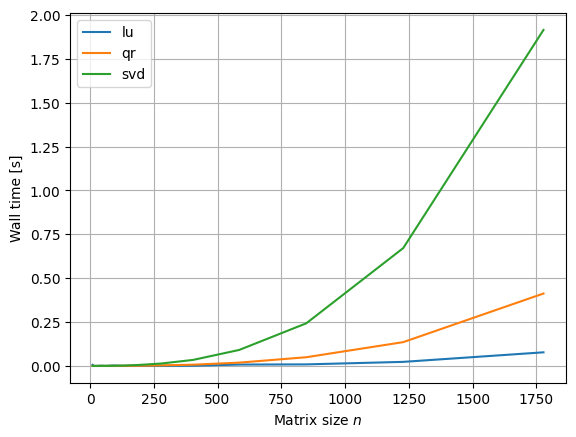

In [4]:
for name, f in [
        ("lu", spla.lu_factor),
        ("qr", npla.qr),
        ("svd", npla.svd)
        ]:

    times = []
    print("----->", name)
    
    for n in n_values:
        print(n)

        A = np.random.randn(n, n)
        
        start_time = process_time()
        f(A)
        times.append(process_time() - start_time)
        
    pt.plot(n_values, times, label=name)

pt.grid()
pt.legend(loc="best")
pt.xlabel("Matrix size $n$")
pt.ylabel("Wall time [s]")

* The faster algorithms make the slower ones look bad. But... it's all relative.
* Is there a better way of plotting this?
* Can we see the asymptotic cost ($O(n^3)$) of these algorithms from the plot?